# EDA 2 - Summary

Ok, before we can do analysis.. the second major step of EDA is numerical summarization and data visualisation. This is about doing some high-level work (painting w/ broad strokes) to make formal analysis and model building easier. 

In [1]:
# First let's do do our setup work. 
import pandas
import numpy
from scipy.stats import iqr

movies = pandas.read_csv('movie_stats.csv')

# As a good rule of thumb, let's do a quick head inspection
movies.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
0,Evan Almighty,175000000.0,100289690.0,1.741313e+08,PG,Comedy
1,Waterworld,175000000.0,88246220.0,2.642462e+08,PG-13,Action
2,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,PG-13,Adventure
3,47 Ronin,175000000.0,38362475.0,1.517168e+08,PG-13,Action
4,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,PG-13,Action
5,Guardians of the Galaxy,170000000.0,333172112.0,7.710513e+08,PG-13,Action
6,Iron Man 2,170000000.0,312433331.0,6.211564e+08,PG-13,Action
7,Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,PG-13,Action
8,Dawn of the Planet of the Apes,170000000.0,208545589.0,7.106446e+08,PG-13,Adventure
9,The Polar Express,170000000.0,186493587.0,3.106342e+08,G,Adventure


We can use ```describe()``` to get common summary statistics for the columns in the data frame.  However... by default it only includes numeric columns, so we have to specify ```include='all'``` as a parameter to display categorical variables. 

In [2]:
movies.describe(include='all')

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
count,3401,3.401000e+03,3.401000e+03,3.401000e+03,3264,3401
unique,3400,NaN,NaN,NaN,4,5
top,Tau ming chong,NaN,NaN,NaN,R,Drama
freq,2,NaN,NaN,NaN,1514,1236
mean,NaN,3.328474e+07,4.542179e+07,9.411512e+07,NaN,NaN
std,NaN,3.489239e+07,5.882566e+07,1.409182e+08,NaN,NaN
min,NaN,2.500000e+05,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,9.000000e+06,6.118683e+06,1.061881e+07,NaN,NaN
50%,NaN,2.000000e+07,2.553382e+07,4.015902e+07,NaN,NaN
75%,NaN,4.500000e+07,6.032379e+07,1.176152e+08,NaN,NaN


Take a second to look at the variables. Which ones are numeric? (discrete vs. continuous). Which ones are categorical? (ordinal, nominal or binary). 

Look at the summaries on the right. What does this tell us about the variables? 

### Quantitative Summaries: Central Tendency

We're going to look at some of the summary statistics for quantitative data. We'll focus on ```production_budget```.

- **mean** --> average (sum of all observations divided by the total number of observatons)
- **median** -->the middle value of the variable when sorted. 
- **mode** --> the most frequent value in the variable
- **trimmed mean** --> This is a special mean calculation that excludes x percent of the lowest and highest data points (often outliers that may “pull” the mean or skew the data)


In [3]:
# we could calculate the mean long hand using sum and count, but that's silly!
movies.production_budget.mean()

33284743.23640106

In [4]:
# median is just as simple

In [5]:
movies.production_budget.median()

20000000.0

In [6]:
# mode is also simple to calc, but harder to read. 
## The first number you see is an index, the second is the actual value. If the distribution were multimodal, there would be more rows, such
## that the first value would increase sequentially (as indexes do) and the second value would be the other modes
movies.production_budget.mode()

0    20000000.0
Name: production_budget, dtype: float64

In [7]:
# This helps explain the index... the "Series" is a single column, so the index is referring to a value in the series. 
type(movies.production_budget.mode())

pandas.core.series.Series

In [8]:
# Trimmed mean isn't as simple...
## Pandas doesn't have a means of doing this so we're going to use scipy.stats, trim_mean. 
## we pass the feature as the first argument to the method. The second argument is the percentage of the the dataset we want to clip/trim off each end. 
##
## REMEMBER: If you specify proportiontocut=0.1, then you are clipping off 10% from each end or a total of 20% of the data
from scipy.stats import trim_mean
trim_mean(movies.production_budget, proportiontocut=0.1)

26895401.874310914

In [9]:
# for giggles let's increase the trim
trim_mean(movies.production_budget, proportiontocut=0.2)

23949546.79078883

Note the differences. The first 10% trim cut off about 6 million dollars from the mean. The second 10% trim cut off 3 million. 

What do you think this tells you? (HINT: It means the data might be left skewed.) As we clip off an equal percentage from either end in terms of data points, the mean decreases, which means that we are removing values that were pulling the mean up and away from the median. 

We also know that the median is the mode or the most frequent value. 

This is an important concept, because it helps us conceptualize the "gravity" that outliers can exert on statistical analysis. (It's also hard to do this w/o visualization unless you've been doing it for a while!) 

### Quantitative Summaries: Measures of Spread

Spread describes variability, which might be stability or consistency depending on the meaning of the variable. It provides context for measures of central tendency. 

- **range**: the difference between the maximum and minimum values of a variable
- **(IQR) interquartile range**: the difference between the 25th and 75th percentile values.
- **variance**: the average of the squared distance from each data point to the mean.
- **(SD) standard deviation**: the square root of the variance
- **(MAD) mean absolute deviation**: the mean absolute value of the distance between each data point and the mean. 

In [10]:
# Range is a fairly basic value. It just gives us a quantification of the breadth of the variable between it's bookends. 
movies.production_budget.max() - movies.production_budget.min()

174750000.0

In [11]:
# There are a few ways to calculate interquartile range. 
## pandas offers quantile. 
movies.production_budget.quantile(0.75) - movies.production_budget.quantile(0.25)

36000000.0

In [12]:
# numpy also offers quantile, but the syntax is a little different. 
## quantile requires a decimal input..
numpy.quantile(movies.production_budget, 0.75) - numpy.quantile(movies.production_budget, 0.25)

36000000.0

In [13]:
# numpy also offers the percentile
## percentile takes a whole number percentage and converts it to decimal. 
numpy.percentile(movies.production_budget, 75) - numpy.percentile(movies.production_budget, 25)

36000000.0

In [14]:
# scipy.stats offers iqr, which is probably the easiest to use
iqr(movies.production_budget)

36000000.0

IQR is similar (in concept) to **trimmed_mean**. Mathematically, it keeps 25% of the values to either side of the median. This means that the values below 25% and above 75% (the tails of a normal distribution) are "chopped off"

In [15]:
# variance is provided by pandas
movies.production_budget.var()

1217478921139135.5

In [16]:
# standard deviation
movies.production_budget.std()

34892390.59077402

If you look at **variance**, you'll notice that it's a bit of a ridiculous value. Since it represents squared distances, it isn't easy to interpret. This is because the number isn't "relatable" in terms of the values and data we're analyzing to begin with. I like to think of this as a transitional statistic, because variance is something we'll use to calculate other values. (Although, ```python``` is pretty rad. Most of the libraries allow you to skip over some of these statistics to calculate the final values...). Sometimes that is a problem though. It's generally important to understand the math. 

**Standard deviation** is the square root of the squared distances, which (kind of) offsets the squaring of the distances. As you can see this creates a number that is more relatable to the other values we're working with. (The **IQR** was 36 million, the **standard deviation** was just short of 35 million)

In [17]:
# MAD (Mean Absolute Deviation)
#
## NOTE 1: pandas 1.x had a method called mad(). This is deprecated and removed in 2.x. 
# I cheat by using a lambda
mad = lambda x: (x - x.mean()).abs().mean()

movies.production_budget.agg(mad)

26090426.818845242

In [18]:
# you can do this w/ numpy as well
numpy.mean(numpy.abs(movies.production_budget - numpy.mean(movies.production_budget)))

26090426.818845242

#### What exactly is MAD????

This is a less understood measure of spread, but it's quite powerful, so I want to take the time to explan it. 

Let's say we have a dataset: ```[1,2,3,4,5]```

1. Calculate the Mean.

1 + 2 + 3 + 4 + 5 = 15 / 5 = **3**

2. Now we find the deviations from the mean. This means we subtract the mean from each data point

1 - 3 = **-2**
2 - 3 = **-1**
3 - 3 = **0**
4 - 3 = **1**
5 - 3 = **2**

3. Take the absolute values.

**2, 1, 0, 1, 2**

```This is important```

4. Calculate the mean of the absolute deviations.

2 + 1 + 0 + 1 + 2 = 6 / 5 = **1.2**

```If we don't take the absolute values, then the sum of the deviations alone will cancel out and the mean of the deviations will be 0```

---

- **Robustness**: Because MAD uses absolute values, it reduces the impact of outliers compared to measures like variance and standard deviation, which square the deviations.
- **Intuitive Measure**: MAD is intuitive as it directly relates to the average distance from the mean, making it easy to interpret.
- **Comparison Across Datasets**: As an average measure of dispersion, MAD allows comparison of variability between different datasets, even when they have different scales or units.



### Visualizing Quantitatives Variables

we're going to look at boxplots and and histograms. 

In [19]:
# Setup the libs we need...
import matplotlib.pyplot as plt
import seaborn as sns

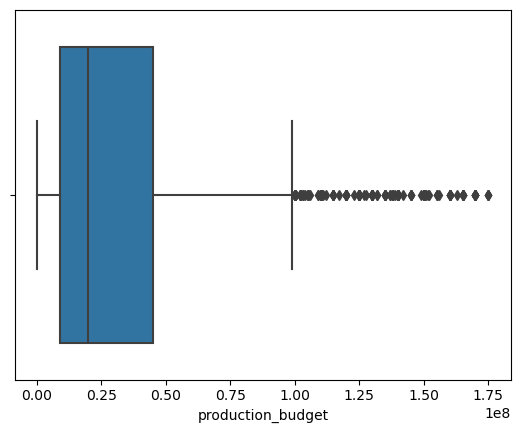

In [22]:
# create the visualization (figure)
# show the visualization (figure)
# close() closes the figure... so we can create another one later. 

sns.boxplot(x='production_budget', data=movies)
plt.show()
plt.close()

/home/edmangini/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


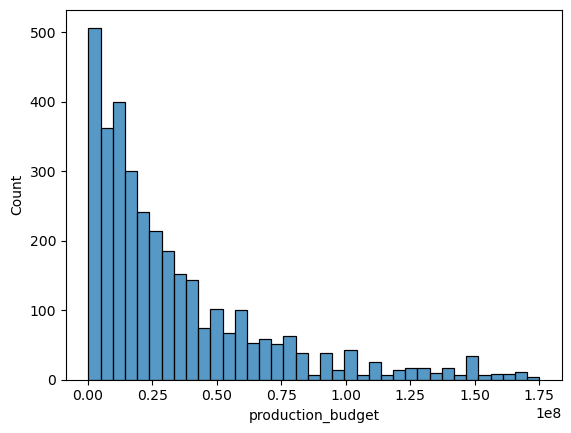

In [23]:
# Now let's do it w/ a histogram
sns.histplot(x='production_budget', data=movies)
plt.show()
plt.close()

There is a lot more that we can do with visualization, but this is a quick way to view the data we are working with. 

Do you remember when we suggested the data was left skewed? :) Here you can see that is the case. 

### Summarizing Categorical Variables: Frequencies and Proportions 

Frequency is a simple base measure for categorical data. It answers the question *How much of each?*. 
One of the challenges of frequency is that it is fairly raw in terms of numbers. 

Humans are better at visualizing part-whole relationships, so creating proportions (pieces of a pie) are more relatable. 

In [25]:
# count 'em up!
movies.genre.value_counts()

genre
Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: count, dtype: int64

In [26]:
# bake a pie!
movies.genre.value_counts(normalize=True)

genre
Drama        0.363423
Comedy       0.239047
Action       0.168480
Adventure    0.141429
Horror       0.087621
Name: proportion, dtype: float64

### Visualizing Categorical Variables. 

Bar charts and pie charts are the most common representations of categorical data, and the relationship is fairly intuitive. A bar chart is appropriate for counts and frequency, and a pie chart, by definition, represents part whole relationships. 

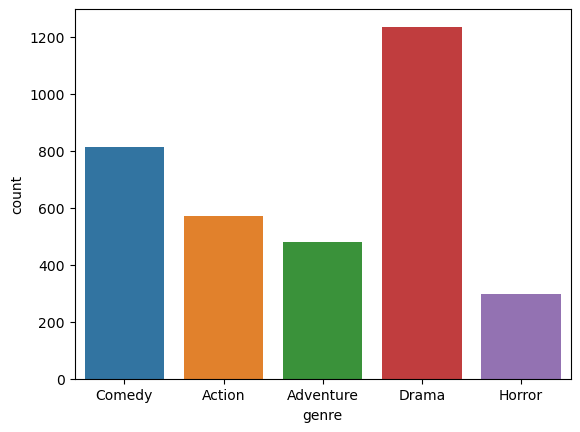

In [29]:
# Seaborn's countplot is a barchart. 
sns.countplot(x='genre', data=movies)
plt.show()
plt.close()

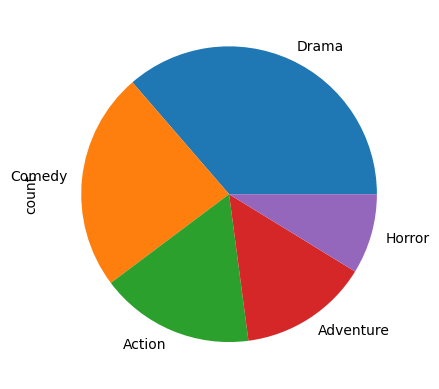

In [31]:
# pie charts are a little different. 
movies.genre.value_counts().plot.pie()
plt.show()
plt.close()